In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("loan_data.csv")
data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [3]:
data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [4]:
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

<Axes: >

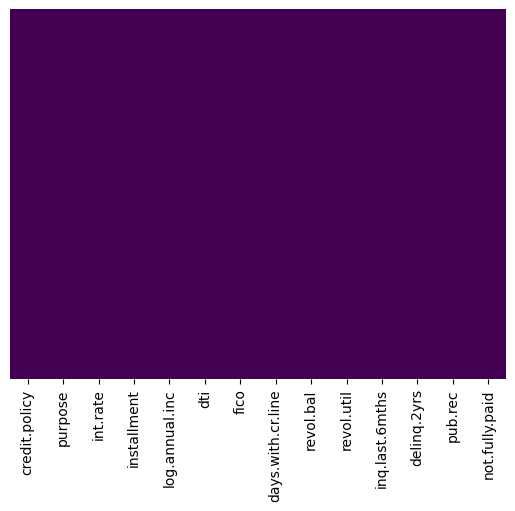

In [5]:
sns.heatmap(data.isnull(), cbar = False, cmap = "viridis", yticklabels = False)

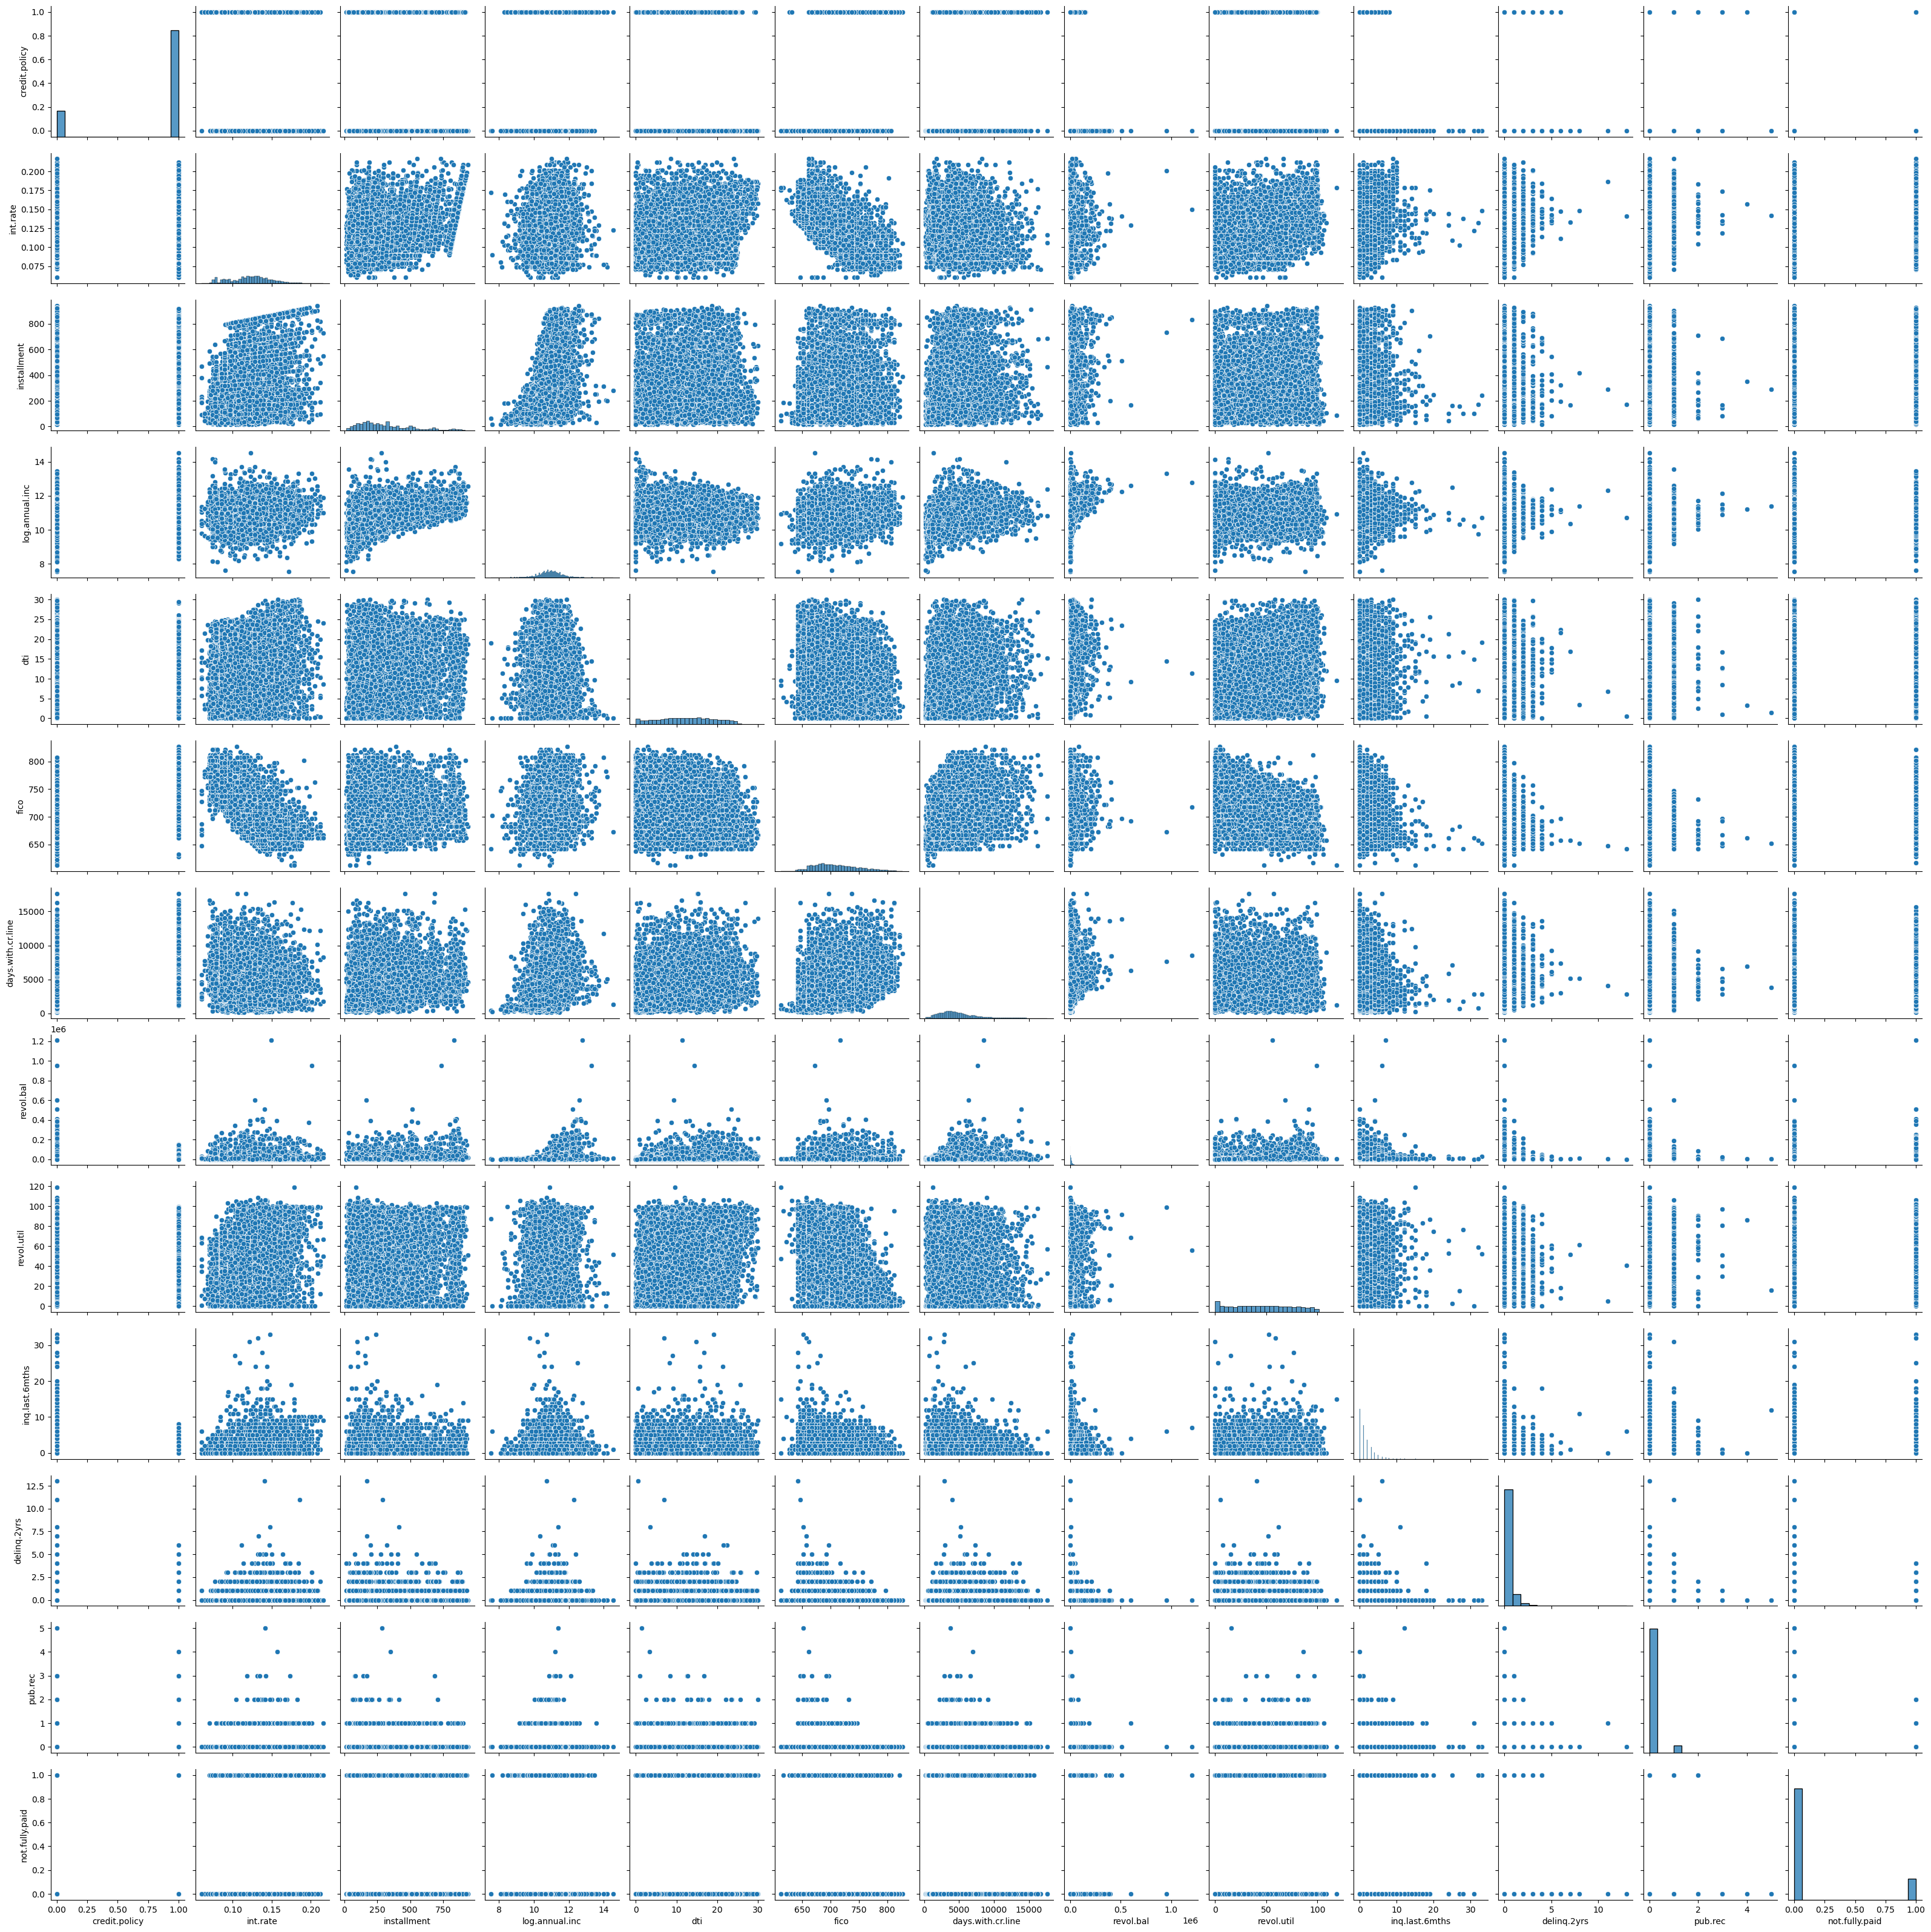

In [6]:
sns.pairplot(data)

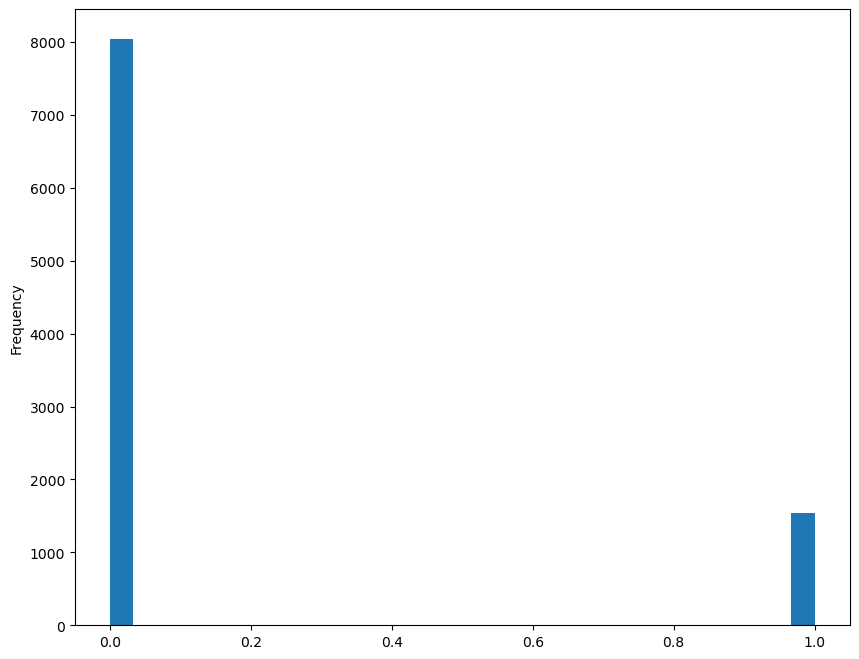

In [7]:
plt.figure(figsize= (10, 8))
data['not.fully.paid'].plot.hist(bins = 30)
plt.show()

<Axes: xlabel='inq.last.6mths', ylabel='count'>

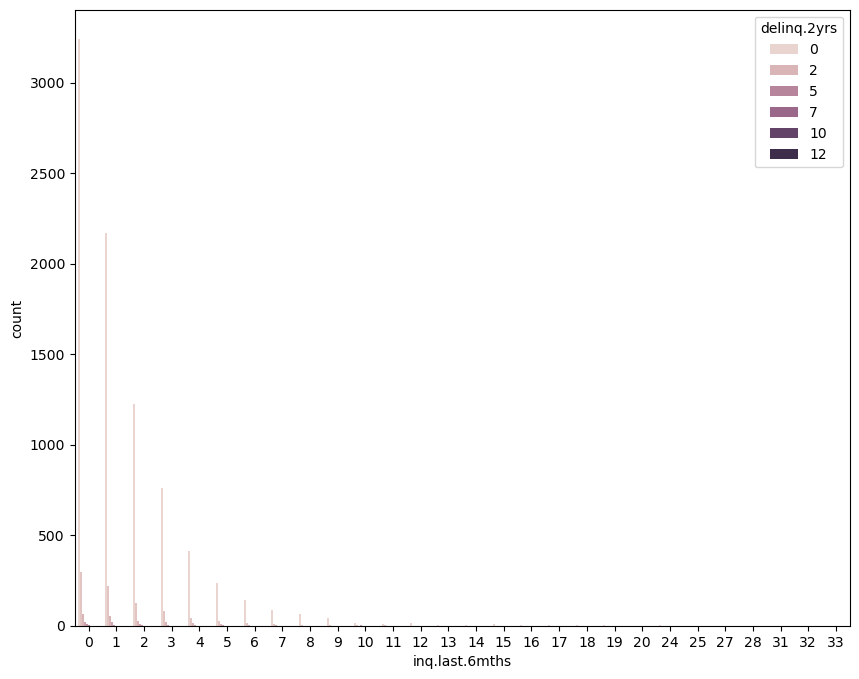

In [8]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'inq.last.6mths', hue = 'delinq.2yrs', data = data)

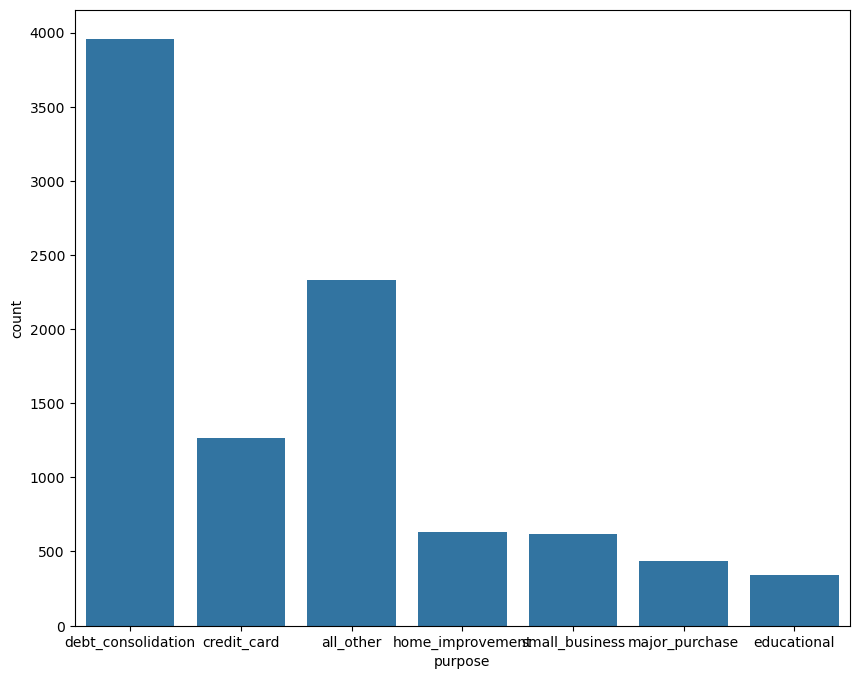

In [9]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'purpose', data = data)
plt.show()

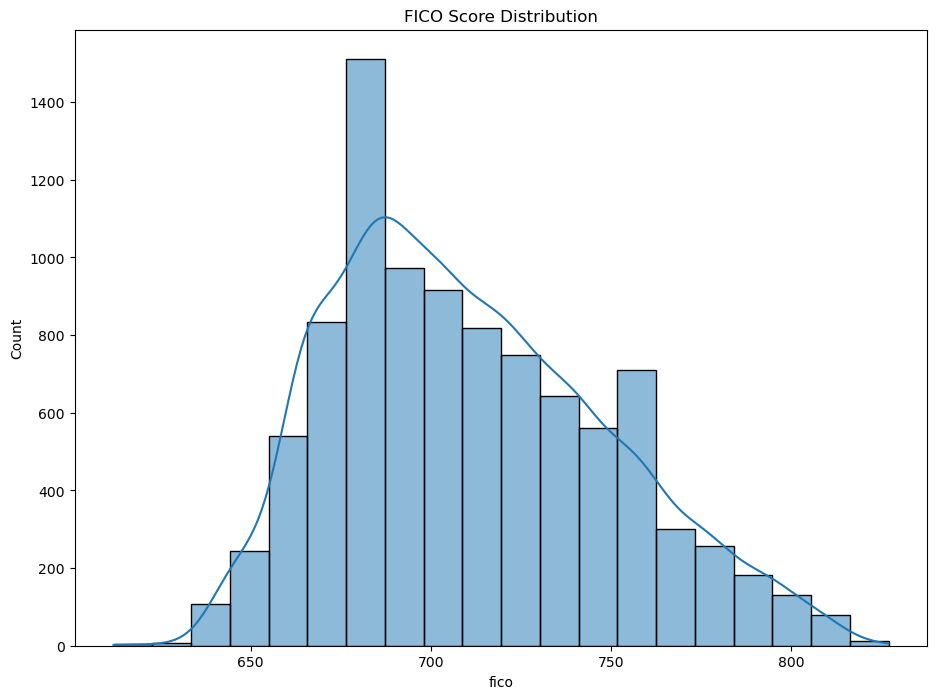

In [10]:
plt.figure(figsize = (11,8))
sns.histplot(data['fico'], bins = 20, kde = True)
plt.title('FICO Score Distribution')
plt.show()

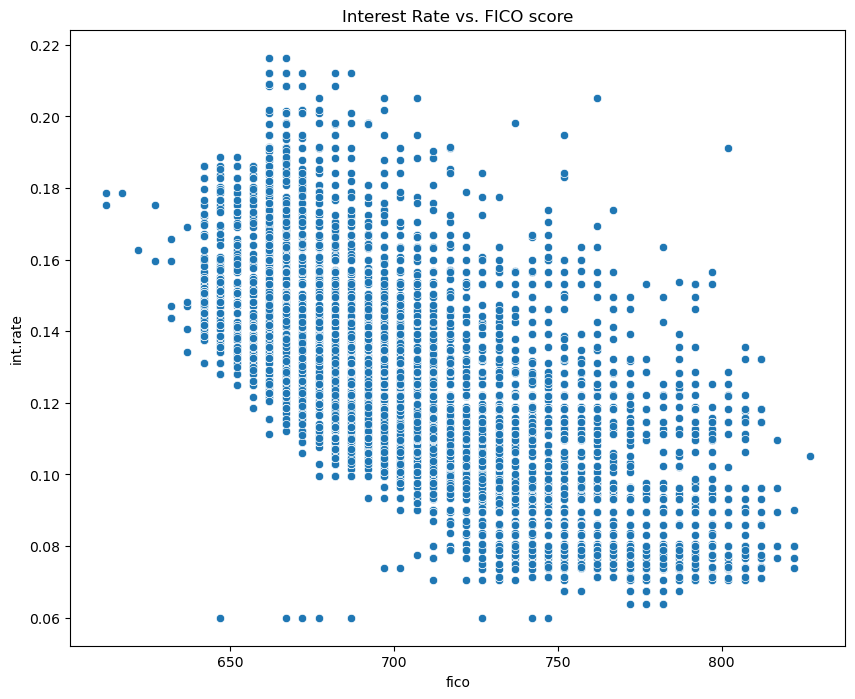

In [11]:
# Scatter plot for interest rate vs. FICO rate
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'fico', y = 'int.rate', data = data)
plt.title('Interest Rate vs. FICO score')
plt.show()

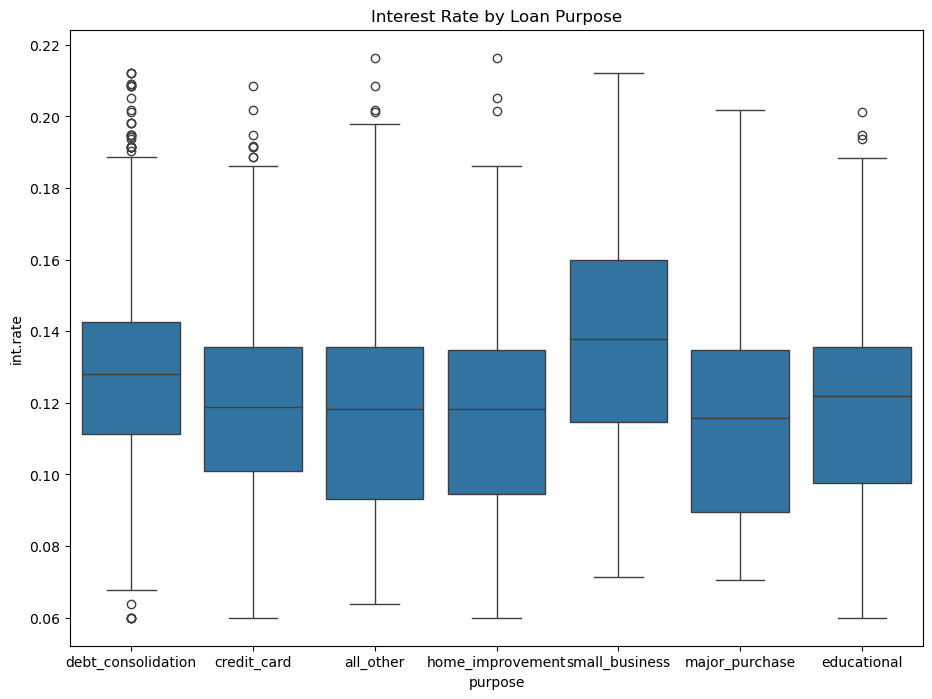

In [12]:
plt.figure(figsize = (11,8))
sns.boxplot(x = 'purpose', y = 'int.rate', data = data)
plt.title('Interest Rate by Loan Purpose')
plt.show()

In [13]:
data['purpose'].value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

In [14]:
data['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [15]:
map = {'debt_consolidation':0, 'credit_card':1, 'all_other':2,
       'home_improvement':3, 'small_business':4, 'major_purchase':5,
       'educational':6}
map

{'debt_consolidation': 0,
 'credit_card': 1,
 'all_other': 2,
 'home_improvement': 3,
 'small_business': 4,
 'major_purchase': 5,
 'educational': 6}

In [16]:
data['purpose'] = data['purpose'].replace(map)
data

C:\Users\USER\AppData\Local\Temp\ipykernel_13464\330594523.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['purpose'] = data['purpose'].replace(map)


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,2,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,2,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,3,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


<Axes: >

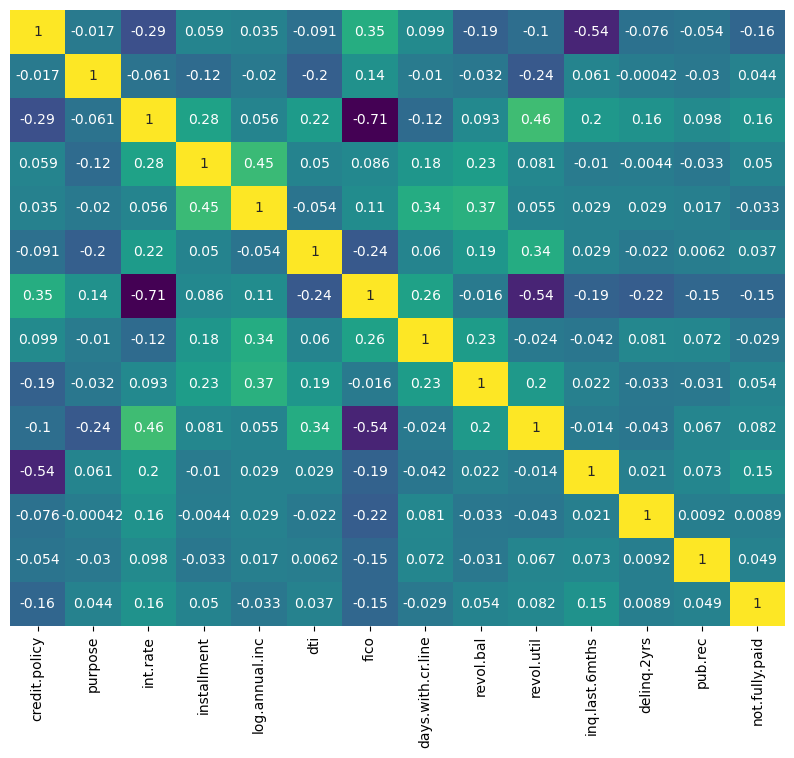

In [17]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), cmap = 'viridis', cbar = False, yticklabels = False, annot = True)

In [18]:
corr_matrix = data.corr()
corr_matrix

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.017331,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
purpose,-0.017331,1.000000,-0.061173,-0.119683,-0.019800,-0.199278,0.144098,-0.010047,-0.031574,-0.239537,0.061419,-0.000417,-0.029831,0.044193
int.rate,-0.294089,-0.061173,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,-0.119683,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,-0.019800,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,-0.199278,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,0.144098,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.010047,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,-0.031574,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,-0.239537,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088


In [19]:
data['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

# Example pruned features from SHAP importance
pruned_features = ['purpose', 'int.rate', 'installment', 'log.annual.inc', 'dti', 
            'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 
            'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'credit.policy']

# Prepare data
X = data[pruned_features]
y = data['not.fully.paid']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# 2. Define Features and Target
X = data.drop('not.fully.paid', axis=1)
y = data['not.fully.paid']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Define and Train Models
logreg_model = LogisticRegression(max_iter=1000)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lgbm_model = LGBMClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

logreg_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# 5. Save Models
os.makedirs("models", exist_ok=True)
joblib.dump(logreg_model, 'models/logistic_regression_model.joblib')
joblib.dump(dt_model, 'models/decision_tree_model.joblib')
joblib.dump(rf_model, 'models/random_forest_model.joblib')
joblib.dump(lgbm_model, 'models/lightgbm_model.joblib')
joblib.dump(xgb_model, 'models/xgboost_model.joblib')

print("✅ All models trained and saved successfully.\n")

# 6. Make Predictions on Test Set
logreg_pred = logreg_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
lgbm_pred = lgbm_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# 7. Accuracy Summary
print("🔍 Model Accuracies on Test Set:")
print(f"Logistic Regression: {accuracy_score(y_test, logreg_pred):.3f}")
print(f"Decision Tree: {accuracy_score(y_test, dt_pred):.3f}")
print(f"Random Forest: {accuracy_score(y_test, rf_pred):.3f}")
print(f"LightGBM: {accuracy_score(y_test, lgbm_pred):.3f}")
print(f"XGBoost: {accuracy_score(y_test, xgb_pred):.3f}")

# 8. Classification Reports
print("\n📝 Classification Reports:")
print("Logistic Regression:\n", classification_report(y_test, logreg_pred))
print("Decision Tree:\n", classification_report(y_test, dt_pred))
print("Random Forest:\n", classification_report(y_test, rf_pred))
print("LightGBM:\n", classification_report(y_test, lgbm_pred))
print("XGBoost:\n", classification_report(y_test, xgb_pred))

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 1067, number of negative: 5637
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1839
[LightGBM] [Info] Number of data points in the train set: 6704, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.159159 -> initscore=-1.664501
[LightGBM] [Info] Start training from score -1.664501


C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:28:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ All models trained and saved successfully.

🔍 Model Accuracies on Test Set:
Logistic Regression: 0.838
Decision Tree: 0.733
Random Forest: 0.835
LightGBM: 0.832
XGBoost: 0.825

📝 Classification Reports:
Logistic Regression:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.53      0.02      0.04       466

    accuracy                           0.84      2874
   macro avg       0.68      0.51      0.47      2874
weighted avg       0.79      0.84      0.77      2874

Decision Tree:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      2408
           1       0.20      0.22      0.21       466

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.74      0.73      0.74      2874

Random Forest:
               precision    recall  f1-score   support

           0       0.84      0.9

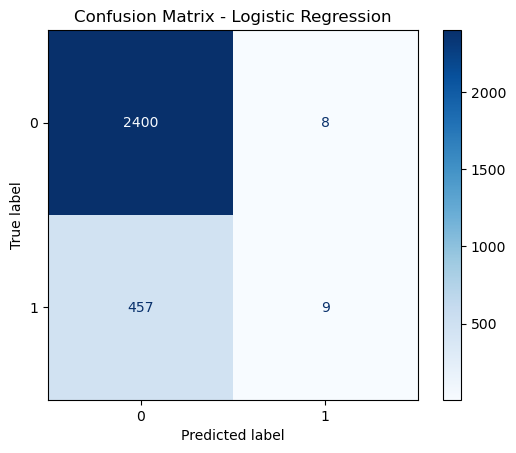

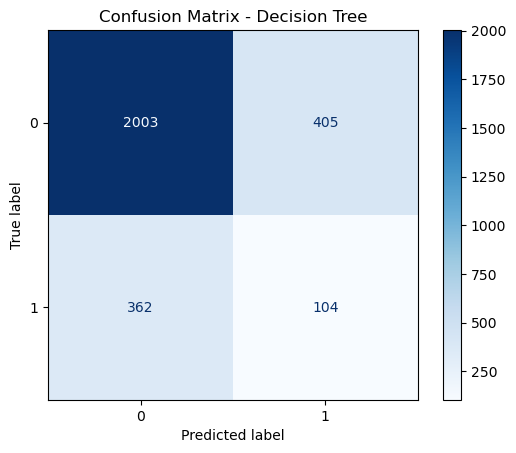

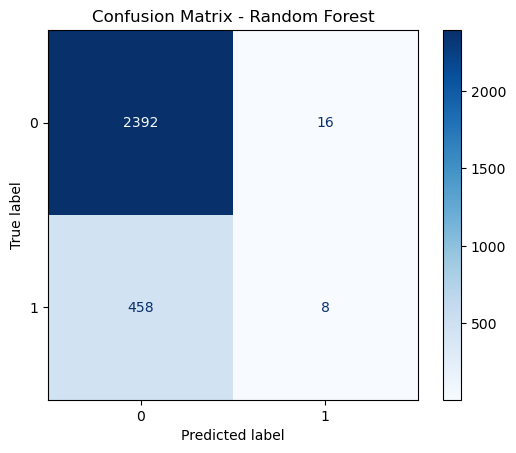

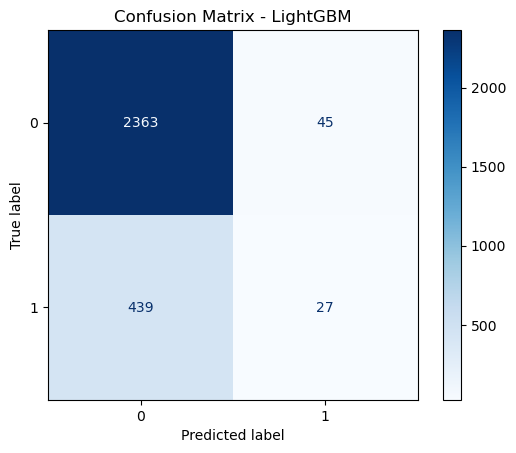

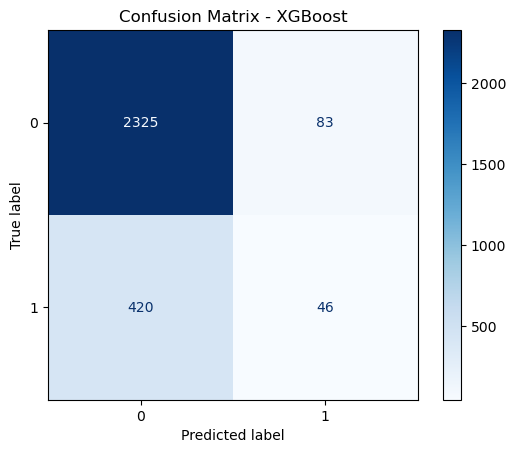

In [26]:
# 9. Confusion Matrices
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LightGBM', 'XGBoost']
model_predictions = [logreg_pred, dt_pred, rf_pred, lgbm_pred, xgb_pred]

for name, pred in zip(model_names, model_predictions):
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.grid(False)
    plt.show()